In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# formatting for calculations below
pd.options.display.float_format = '{:,.2f}'.format

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv("data/city_data.csv")
df_ride = pd.read_csv("data/ride_data.csv")

# merging the City and Ride Data into one data table
pyber_table = pd.merge(df_city, df_ride, on="city", how="outer")


# Display the data table for preview
pyber_table.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
# listing all colums within the dataframe
pyber_table.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [5]:
# reorganizing the coulmns
organized_pyber = pyber_table[["city", "date", "fare", "ride_id", "driver_count", "type"]]
organized_pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [6]:
# groupng data by city
pyber_city = organized_pyber.groupby(['city'])

In [7]:
# average fare per city
avg_fare = pyber_city['fare'].mean()

In [8]:
# total number of rides per city 
rides_per_city= pyber_city['ride_id'].count() 

In [9]:
# total number of drivers per city
drvrs_per_city = pyber_city['driver_count'].mean()

In [10]:
city_type= organized_pyber.drop_duplicates('city')

In [11]:
updated_ct = city_type.set_index('city')['type']

In [12]:
updated_pyber_city = pd.DataFrame({
    "Number of Rides": rides_per_city,
    "Average Fare": avg_fare,
    "Number of Drivers": drvrs_per_city,
    "Type of City": updated_ct})

updated_pyber_city.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.64,12,Urban
Barajasview,22,25.33,26,Urban
Barronchester,16,36.42,11,Suburban
Bethanyland,18,32.96,22,Suburban
Bradshawfurt,10,40.06,7,Rural


## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size



Text(45, 35, 'Note:\n Circle size correlates with driver count per city')

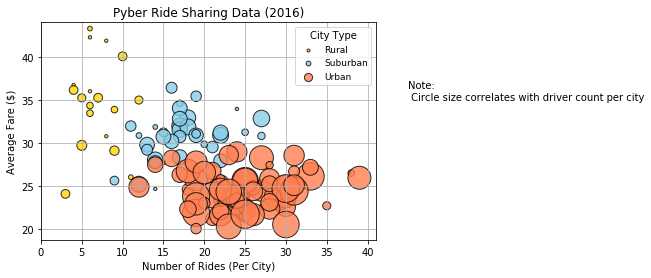

In [13]:
rural = updated_pyber_city.loc[updated_pyber_city['Type of City']=="Rural"]
urban = updated_pyber_city.loc[updated_pyber_city['Type of City']=="Urban"]
suburban = updated_pyber_city.loc[updated_pyber_city['Type of City']=="Suburban"]

plt.scatter(rural['Number of Rides'],rural['Average Fare'],s=rural['Number of Drivers']*11, color = 'gold',edgecolor = 'black', label = "Rural", alpha = .80)
plt.scatter(suburban['Number of Rides'],suburban['Average Fare'],s=suburban['Number of Drivers']*11, color = 'skyblue',edgecolor = 'black', label = "Suburban", alpha = .80)
plt.scatter(urban['Number of Rides'],urban['Average Fare'],s=urban['Number of Drivers']*11, color = 'coral',edgecolor = 'black', label = "Urban", alpha = .80)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,41)
plt.ylim(18.8,44)
plt.grid()
plt.legend(loc="best", title="City Type",scatterpoints=1, fontsize=9, markerscale=0.4)
note = ("Note:\n Circle size correlates with driver count per city")
plt.text(45,35,note)


In [14]:
# Show plot
plt.show()

In [15]:
# Save Figure
plt.savefig('Pyber_Ride_Sharing_Data.png')

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart



In [16]:

# created dataframe which contain total fare by city type and found % of total fare
fares_df = pd.merge(df_city, df_ride, on='city')

fares_df = fares_df.groupby('type')['fare'].sum()

fares_df = pd.DataFrame(fares_df)

fares_df = fares_df.reset_index()

fares_df['% of total fare'] = fares_df['fare']/fares_df['fare'].sum()*100
fares_df

,type,fare,% of total fare
0,Rural,"4,327.93",6.81
1,Suburban,"19,356.33",30.46
2,Urban,"39,854.38",62.72


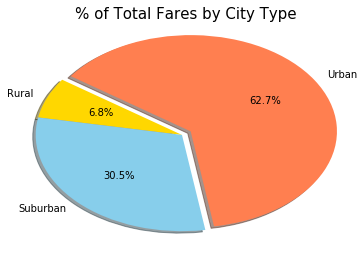

In [17]:
# Pie chart
types = fares_df['type']
total_fare = fares_df['% of total fare'] # Data which we want to show as a pie chart
colors = ["gold", "skyblue", "coral",]
explode = (0, 0, 0.07)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)

# plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Fares by City Type', fontsize=15)
plt.axis("normal")
plt.show()

In [18]:
# Show Figure
plt.show()

In [19]:
# Save Figure
plt.savefig('Total_Fares_by_City_Type.png')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart


In [20]:

rides_df = pyber_table.groupby('type')['ride_id'].sum()

rides_df  = pd.DataFrame(rides_df)

rides_df  = rides_df .reset_index()

rides_df ['% of total rides'] =  rides_df ['ride_id']/rides_df ['ride_id'].sum()* 100
rides_df 

,type,ride_id,% of total rides
0,Rural,580968240341287,5.01
1,Suburban,3106884522576766,26.77
2,Urban,7919412664056093,68.23


(-1.1142266003316816,
 1.1849031247642068,
 -1.091037853571282,
 1.141729441556563)

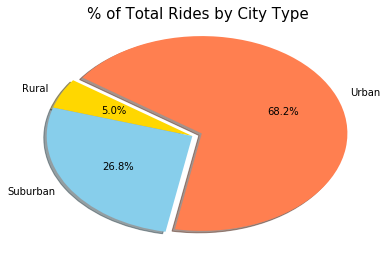

In [21]:
# Pie chart
types = rides_df['type']
total_fare = rides_df['% of total rides'] # Data which we want to show as a pie chart
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.07)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)


# plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Rides by City Type', fontsize=15)
plt.axis("normal")

In [22]:
# Show Figure
plt.show()

In [23]:
# Save Figure
plt.savefig('Total_Rides_by_City_Type.png')

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts


In [24]:
# created dataframe which contain total driver counts and % of total drivers based on city type
drivers_df = pyber_table.groupby('type')['driver_count'].sum()

drivers_df = pd.DataFrame(drivers_df)

drivers_df = drivers_df.reset_index()

drivers_df['% of total drivers'] = drivers_df['driver_count']/drivers_df['driver_count'].sum()* 100
drivers_df

,type,driver_count,% of total drivers
0,Rural,537,0.78
1,Suburban,8570,12.47
2,Urban,59602,86.75


(-1.1039455172250747,
 1.1828558617265705,
 -1.0730412245959744,
 1.1391867645560276)

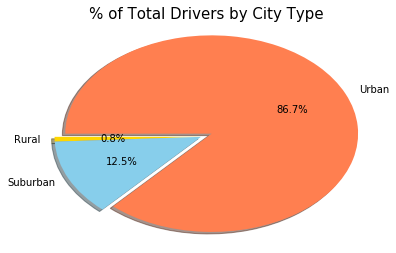

In [25]:
# Pie chart
types = drivers_df['type']
total_fare = drivers_df['% of total drivers'] # Data which we want to show as a pie chart
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.08)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

# plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Drivers by City Type', fontsize=15)
plt.axis("normal")

In [ ]:
# Show Figure
plt.show()

In [26]:
# Save Figure
plt.savefig('Total_Drivers_by_City_Type.png')

<Figure size 432x288 with 0 Axes>